# Servicios Web y APIs 

## Índice
1. [API Air Quality](#air)
2. [API de OpenWeather](#wea)
3. [API de la NASA](#nasa)
4. [Yahoo Finance](#yah)

En este Notebook vamos a llamar a diversas APIs. Antes de comenzar, es importante destacar dos conceptos:  

1) **Codificación de URLs**: Toda cadena de cadena de caracteres que se introduzca en una URL tiene que codificarse adecuadamente. En Python, podemos utilizar la función `quote()` del paquete `urllib.parse`

In [3]:
import urllib.parse
urllib.parse.quote(' ')

'%20'

2) **Peticiones HTTP**: la librería `requests` es la más utilizada para realizar peticiones HTTP en Python, permitiendo utilizar los métodos más comunes de este protocolo (GET, POST, PUT, etc.). Para más información entra en este [enlace](https://realpython.com/python-requests/)

También podemos utilizar la librería `urllib.request`

<a id="air"></a>
## API Air Quality

Esta API abierta proporciona información acerca de la calidad del aire en diversas ciudades. La lista de APIS se encuentra en https://api.openaq.org/  

En primer lugar vamos a llamar a la API **cities**, la cual nos informa de las ciudades disponibles

In [9]:
import urllib.request
import json

url1 = 'https://api.openaq.org/v2/cities'

pais = input('Introduzca las siglas del país (por ejemplo ES): ')

url = url1 + '?country=' + pais

print(url)

datos = urllib.request.urlopen(url).read().decode()
js = json.loads(datos)

for item in js['results']:
    print(item['city'])

Introduzca las siglas del país (por ejemplo ES): ES
https://api.openaq.org/v2/cities?country=ES
A Coruña
Albacete
Alcover
Alicante/Alacant
Almeria
Almería
Ametlla de Mar, l'
Araba/Álava
Asturias
Ávila
Badajoz
Barcelona
Bellver de Cerdanya
Bizkaia
Burgos
Cáceres
Cádiz
Cantabria
Carboneras
Castellón/Castelló
CCAA Catalu�a
CCAA Com. Valenciana
CCAA Galicia
CCAA Pa�s Vasco
Ciudad Real
Córdoba
Cuenca
Gipuzkoa
Girona
Granada
Guadalajara
Huelva
Huesca
Igualada
Illes Balears
Jaén
La Rioja
Las Palmas
León
Lleida
Lugo
Madrid
Malaga
Málaga
Marbella
Montcada i Reixac
Murcia
Navarra
Niebla
Ourense
Palencia
Pardines
Pontevedra
Sabadell
Salamanca
Santa Cruz de Tenerife
Sant Vicenç dels Horts
Segovia
Sevilla
Soria
Sort
Tarragona
Teruel
Toledo
Tona
Valencia/València
Valladolid
Vandellòs i l'Hospitalet de l'
Vic
Viladecans
Vila-seca
Villanueva Del Arzobispo
Zamora
Zaragoza


Esto mismo podemos realizarlo con la librería `requests`, instalándola previamente.  
Esta librería también me permite utilizar el método POST de HTTP: `requests.post(...)`

In [12]:
import requests
url1 = 'https://api.openaq.org/v2/cities'
pais = input('Introduzca las siglas del país (por ejemplo ES): ')

datos = requests.get(url1, params={'country':pais})

js = datos.json()
for item in js['results']:
    print(item['city'])

Introduzca las siglas del país (por ejemplo ES): ES
A Coruña
Albacete
Alcover
Alicante/Alacant
Almeria
Almería
Ametlla de Mar, l'
Araba/Álava
Asturias
Ávila
Badajoz
Barcelona
Bellver de Cerdanya
Bizkaia
Burgos
Cáceres
Cádiz
Cantabria
Carboneras
Castellón/Castelló
CCAA Catalu�a
CCAA Com. Valenciana
CCAA Galicia
CCAA Pa�s Vasco
Ciudad Real
Córdoba
Cuenca
Gipuzkoa
Girona
Granada
Guadalajara
Huelva
Huesca
Igualada
Illes Balears
Jaén
La Rioja
Las Palmas
León
Lleida
Lugo
Madrid
Malaga
Málaga
Marbella
Montcada i Reixac
Murcia
Navarra
Niebla
Ourense
Palencia
Pardines
Pontevedra
Sabadell
Salamanca
Santa Cruz de Tenerife
Sant Vicenç dels Horts
Segovia
Sevilla
Soria
Sort
Tarragona
Teruel
Toledo
Tona
Valencia/València
Valladolid
Vandellòs i l'Hospitalet de l'
Vic
Viladecans
Vila-seca
Villanueva Del Arzobispo
Zamora
Zaragoza


A continuación, llamamos a la API **latest**, que devuelve los últimos registros de una ciudad o país en concreto

In [17]:
ciudad = input('Introduzca el nombre de la ciudad: ')
url1 = 'https://api.openaq.org/v2/latest'
url2 = url1 + '?limit=1&city=' + urllib.parse.quote(ciudad)
print(url2)

# "El valor de xxx en Madrid a 30-05-2023 es de yyy ug/m3"

datos = urllib.request.urlopen(url2).read().decode()
js = json.loads(datos)

for item in js['results'][0]['measurements']:
    print('El valor de', item['parameter'], 'en ', ciudad,
         'a', item['lastUpdated'], 'es de', item['value'], item['unit'])

Introduzca el nombre de la ciudad: A Coruña
https://api.openaq.org/v2/latest?limit=1&city=A%20Coru%C3%B1a
El valor de pm25 en  A Coruña a 2023-05-30T12:00:00+00:00 es de 17.0 µg/m³
El valor de pm10 en  A Coruña a 2023-05-30T12:00:00+00:00 es de 20.0 µg/m³
El valor de o3 en  A Coruña a 2023-05-30T12:00:00+00:00 es de 67.0 µg/m³
El valor de so2 en  A Coruña a 2023-05-30T12:00:00+00:00 es de 3.4 µg/m³
El valor de no2 en  A Coruña a 2023-05-30T12:00:00+00:00 es de 15.0 µg/m³
El valor de no en  A Coruña a 2023-05-30T10:00:00+00:00 es de 36.0 µg/m³
El valor de co en  A Coruña a 2023-05-30T12:00:00+00:00 es de 190.0 µg/m³


Parseamos el JSON de respuesta para obtener todos los niveles disponibles y la fecha de las mediciones

<a id="wea"></a>
## API de OpenWeather

Esta API permite obtener información climática. Puedes encontrar la documentación en https://openweathermap.org/api.   
Para obtener la API key hay que registrar un email válido, al cual será enviada la clave.  

Vamos a obtener la predicción de velocidad del viento para una ciudad a través de [esta API](https://openweathermap.org/forecast5)

In [19]:
import urllib.request
import json

api_key = '3886d5996f84c5b9a5c953b027fc2306'
ciudad = input('Introduzca una ciudad y un código de Pais: ')
url = 'https://api.openweathermap.org/data/2.5/forecast?q='+ciudad + '&appid=' + api_key 
print(url)

datos = urllib.request.urlopen(url).read().decode()
js = json.loads(datos)

ts = []
speed = []

for item in js['list']:
    speed.append(item['wind']['speed'])
    ts.append(item['dt_txt'])

Introduzca una ciudad y un código de Pais: Santander,ES
https://api.openweathermap.org/data/2.5/forecast?q=Santander,ES&appid=3886d5996f84c5b9a5c953b027fc2306


In [21]:
ts,speed

(['2023-05-30 18:00:00',
  '2023-05-30 21:00:00',
  '2023-05-31 00:00:00',
  '2023-05-31 03:00:00',
  '2023-05-31 06:00:00',
  '2023-05-31 09:00:00',
  '2023-05-31 12:00:00',
  '2023-05-31 15:00:00',
  '2023-05-31 18:00:00',
  '2023-05-31 21:00:00',
  '2023-06-01 00:00:00',
  '2023-06-01 03:00:00',
  '2023-06-01 06:00:00',
  '2023-06-01 09:00:00',
  '2023-06-01 12:00:00',
  '2023-06-01 15:00:00',
  '2023-06-01 18:00:00',
  '2023-06-01 21:00:00',
  '2023-06-02 00:00:00',
  '2023-06-02 03:00:00',
  '2023-06-02 06:00:00',
  '2023-06-02 09:00:00',
  '2023-06-02 12:00:00',
  '2023-06-02 15:00:00',
  '2023-06-02 18:00:00',
  '2023-06-02 21:00:00',
  '2023-06-03 00:00:00',
  '2023-06-03 03:00:00',
  '2023-06-03 06:00:00',
  '2023-06-03 09:00:00',
  '2023-06-03 12:00:00',
  '2023-06-03 15:00:00',
  '2023-06-03 18:00:00',
  '2023-06-03 21:00:00',
  '2023-06-04 00:00:00',
  '2023-06-04 03:00:00',
  '2023-06-04 06:00:00',
  '2023-06-04 09:00:00',
  '2023-06-04 12:00:00',
  '2023-06-04 15:00:00'],

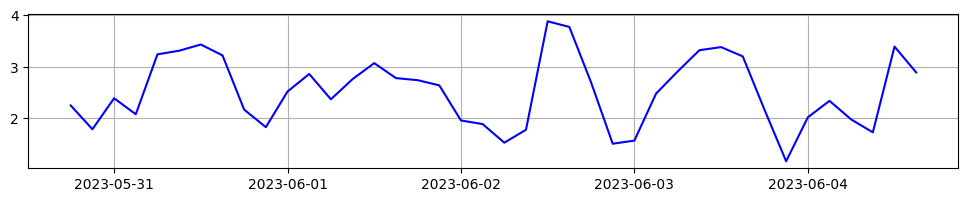

In [22]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
 
ts2 = [datetime.strptime(d,'%Y-%m-%d %H:%M:%S') for d in ts]
fig = plt.figure(figsize=(12,2))
plt.grid()

plt.plot(ts2,speed,color='blue');

<a id="nasa"></a>
## API de la NASA
[Documentación](https://api.nasa.gov/)  
Vamos a obtener fotos de marte a través de la API "Mars Rover Photos" del día 01/09/2022

In [23]:
url = 'https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos'
res = requests.get(url,params={'earth_date':'2022-09-01', 'api_key':'DEMO_KEY'}).json()
res

{'photos': [{'id': 1024497,
   'sol': 3580,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/03580/opgs/edr/fcam/FLB_715310011EDR_F0971170FHAZ00302M_.JPG',
   'earth_date': '2022-09-01',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}},
  {'id': 1024498,
   'sol': 3580,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/03580/opgs/edr/fcam/FRB_715310011EDR_F0971170FHAZ00302M_.JPG',
   'earth_date': '2022-09-01',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}},
  {'id': 1024499,
   'sol': 3580,
   'camera': {'id': 21,


In [24]:
foto_url = res['photos'][0]['img_src']

In [25]:
from IPython.display import Image

display(Image(url=foto_url))

<a id="yah"></a>
## Yahoo Finance
Muchas veces, usamos APIs a través de librerías de Python. Por ejemplo, la librería `yfinance` permite conectarnos a la API de Yahoo finance. Puedes encontrar la documentación en [este enlace](https://aroussi.com/post/python-yahoo-finance)

In [26]:
!pip install yfinance

     ---------------------------------------- 0.0/60.3 kB ? eta -:--:--
     ---------------------------------------- 60.3/60.3 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/143.0 kB ? eta -:--:--
     ---------------------------------------- 143.0/143.0 kB ? eta 0:00:00
     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     ---------------------------------------- 112.2/112.2 kB ? eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


In [27]:
import pandas as pd
import yfinance as yf

In [28]:
yf.download('AMZN', period='5d', interval='1m')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-05-23 09:30:00-04:00,114.269997,114.269997,113.779999,113.900002,113.900002,1904600
2023-05-23 09:31:00-04:00,113.900002,114.139999,113.900002,114.132797,114.132797,277537
2023-05-23 09:32:00-04:00,114.139999,114.500000,113.870003,114.440002,114.440002,365102
2023-05-23 09:33:00-04:00,114.440002,114.722603,114.209999,114.237999,114.237999,309498
2023-05-23 09:34:00-04:00,114.250000,114.500000,114.250000,114.320000,114.320000,172952
...,...,...,...,...,...,...
2023-05-30 12:58:00-04:00,121.970001,121.989998,121.930000,121.982597,121.982597,65312
2023-05-30 12:59:00-04:00,121.980003,122.070000,121.980003,122.050400,122.050400,148609
2023-05-30 13:00:00-04:00,122.050003,122.139999,122.025002,122.120003,122.120003,142396
